<a href="https://colab.research.google.com/github/aniket-ghosh/Deep-Learning-Models/blob/master/VGG16_Malaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount("/content/drive/")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
import numpy as np
import tensorflow as tf
from keras import layers
from keras import Model
import h5py
import matplotlib.pyplot as plt
from keras.initializers import glorot_uniform


Using TensorFlow backend.


In [ ]:
def load_dataset():
  
  train_data = h5py.File("/content/drive/My Drive/Malaria Dataset/Train_Malaria.h5",'r')
  test_data = h5py.File("/content/drive/My Drive/Malaria Dataset/Test_Malaria.h5",'r')

  X_train = np.array(train_data["X_train"])
  Y_train = np.array(train_data["Y_train"])

  X_test = np.array(test_data["X_test"])
  Y_test = np.array(test_data["Y_test"])

  return X_train,Y_train,X_test,Y_test

The shapes are as follows 
 (19291, 80, 80, 3) (19291,) (8267, 80, 80, 3) (8267,)
0


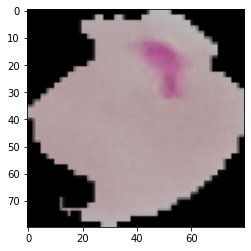

In [ ]:
X_train,Y_train,X_test,Y_test = load_dataset()
print("The shapes are as follows",'\n',X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

print(Y_train[2005])
plt.imshow(X_train[2005])

X_train = X_train/255.
X_test = X_test/255. 

In [ ]:
layer_no = 1
def VGG16(image_shape):

  X_Input = layers.Input(image_shape) # inputing the shape of the image(80x80x3)
  
  
  #Layer1 - Two 64,(3x3) filters (80x80x3)

  X = convlayers(3,X_Input,64)
  X = layers.SpatialDropout2D(0.5)(X)
  X = layers.MaxPooling2D(pool_size=(2,2),strides=(2,2))(X)
  #X = layers.Dropout(0.5)(X)

  #Layer2 - Two 128,(3x3) filters (40x40x64)

  X = convlayers(1,X,128)
  X = layers.MaxPooling2D(pool_size=(2,2),strides=(2,2))(X)
  #X = layers.Dropout(0.5)(X)

  #Layer3 - Three 256,(3x3) filters (20x20x128)

  X = convlayers(1,X,256)
  X = layers.MaxPooling2D(pool_size=(2,2),strides=(2,2))(X)
  #X = layers.Dropout(0.5)(X)

  #Layer4 - Three 512,(3x3) filters (10x10x256)

  X = convlayers(1,X,512)
  X = layers.MaxPooling2D(pool_size=(2,2),strides=(2,2))(X)
  #X = layers.Dropout(0.3)(X)

  #Layer5 - Three 512,(3x3) filters (5x5x512) 

  #X = convlayers(3,X,512)

  #Layer 6 - Fully-Connected

  X = layers.Flatten()(X)
  
  X = layers.Dense(2090,activation='relu',name='Dense1',kernel_initializer=glorot_uniform(seed=1))(X)
  X = layers.Dropout(0.4)(X)

  X = layers.Dense(2090,activation='relu',name='Dense2',kernel_initializer=glorot_uniform(seed=1))(X)
  #X = layers.Dropout(0.3)(X)
  
  X = layers.Dense(1,activation='sigmoid',name='Dense3',kernel_initializer=glorot_uniform(seed=1))(X)

  model = Model(input=X_Input,output=X,name="VGG16_Malaria")

  return model

In [ ]:
def convlayers(num,X,f):
  
  global layer_no

  win = 3
  s = 1
  pad = 'same'

  for i in range(num):

    X = layers.Conv2D(filters=f,kernel_size=(win,win),strides=(s,s),padding=pad,name="Conv"+str(layer_no),kernel_initializer=glorot_uniform(seed=1))(X)
    X = layers.BatchNormalization(axis=-1,name="Batch"+str(layer_no))(X)
    X = layers.Activation('relu')(X)
    layer_no+=1
  
  return X



In [ ]:
model = VGG16(image_shape=(80,80,3))
model.compile(optimizer='adam',loss="binary_crossentropy",metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:48: UserWarning: Update your `Model` call to the Keras 2 API: `Model(name="VGG16_Malaria", inputs=Tensor("in..., outputs=Tensor("De...)`


In [ ]:
model.summary()

Model: "VGG16_Malaria"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 80, 80, 3)         0         
_________________________________________________________________
Conv1 (Conv2D)               (None, 80, 80, 64)        1792      
_________________________________________________________________
Batch1 (BatchNormalization)  (None, 80, 80, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 80, 80, 64)        0         
_________________________________________________________________
Conv2 (Conv2D)               (None, 80, 80, 64)        36928     
_________________________________________________________________
Batch2 (BatchNormalization)  (None, 80, 80, 64)        256       
_________________________________________________________________
activation_2 (Activation)    (None, 80, 80, 64)      

In [ ]:
model.fit(X_train,Y_train,epochs=20,batch_size=40)

Epoch 1/20
19291/19291 [==============================] - 212s 11ms/step - loss: 0.6985 - accuracy: 0.6709
Epoch 2/20
19291/19291 [==============================] - 205s 11ms/step - loss: 0.1660 - accuracy: 0.9462
Epoch 3/20
19291/19291 [==============================] - 204s 11ms/step - loss: 0.1412 - accuracy: 0.9541
Epoch 4/20
19291/19291 [==============================] - 204s 11ms/step - loss: 0.1318 - accuracy: 0.9568
Epoch 5/20
19291/19291 [==============================] - 204s 11ms/step - loss: 0.1320 - accuracy: 0.9571
Epoch 6/20
19291/19291 [==============================] - 203s 11ms/step - loss: 0.1508 - accuracy: 0.9536
Epoch 7/20
19291/19291 [==============================] - 203s 11ms/step - loss: 0.1238 - accuracy: 0.9582
Epoch 8/20
19291/19291 [==============================] - 203s 11ms/step - loss: 0.1240 - accuracy: 0.9587
Epoch 9/20
19291/19291 [==============================] - 203s 11ms/step - loss: 0.1236 - accuracy: 0.9586
Epoch 10/20
19291/19291 [============

In [ ]:
pred = model.evaluate(X_test,Y_test)
print("loss = ",pred[0],'\n',"test accuracy = ",pred[1])

8267/8267 [==============================] - 23s 3ms/step
loss =  0.14845721490137723 
 test accuracy =  0.9604451656341553


In [ ]:
model.save("/content/drive/My Drive/Malaria Dataset/VGG16_Malaria_Model.h5")

In [ ]:
param = model.fit(X_train,Y_train,epochs=20,batch_size=40,validation_split=0.3)

Train on 13503 samples, validate on 5788 samples
Epoch 1/20
13503/13503 [==============================] - 64s 5ms/step - loss: 0.6873 - accuracy: 0.8496 - val_loss: 0.8903 - val_accuracy: 0.7030
Epoch 2/20
13503/13503 [==============================] - 56s 4ms/step - loss: 0.1777 - accuracy: 0.9462 - val_loss: 0.1783 - val_accuracy: 0.9432
Epoch 3/20
13503/13503 [==============================] - 56s 4ms/step - loss: 0.1651 - accuracy: 0.9512 - val_loss: 0.1378 - val_accuracy: 0.9589
Epoch 4/20
13503/13503 [==============================] - 56s 4ms/step - loss: 0.1533 - accuracy: 0.9555 - val_loss: 0.1444 - val_accuracy: 0.9604
Epoch 5/20
13503/13503 [==============================] - 56s 4ms/step - loss: 0.1482 - accuracy: 0.9532 - val_loss: 0.1438 - val_accuracy: 0.9575
Epoch 6/20
13503/13503 [==============================] - 56s 4ms/step - loss: 0.1372 - accuracy: 0.9569 - val_loss: 0.1329 - val_accuracy: 0.9592
Epoch 7/20
13503/13503 [==============================] - 56s 4ms/ste

In [ ]:
pred = model.evaluate(X_test,Y_test)
print("loss = ",pred[0],'\n',"test accuracy = ",pred[1])

8267/8267 [==============================] - 8s 955us/step
loss =  0.12888987225621085 
 test accuracy =  0.961654782295227


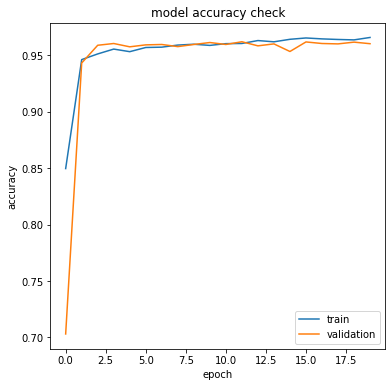

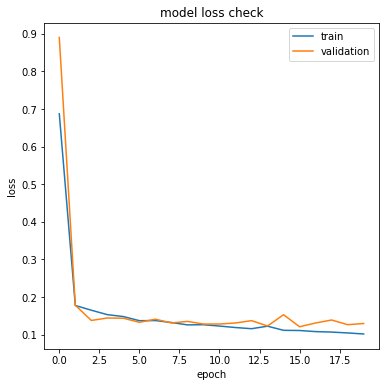

In [ ]:
plt.figure(figsize=(6,6))
plt.plot(param.history['accuracy'])
plt.plot(param.history['val_accuracy'])
plt.title('model accuracy check')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='lower right')
plt.show()

plt.figure(figsize=(6,6))
plt.plot(param.history['loss'])
plt.plot(param.history['val_loss'])
plt.title('model loss check')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper right')
plt.show()

In [ ]:
model.save("/content/drive/My Drive/Malaria Dataset/VGG16_Malaria_Model_1.h5")